In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementation is assuming 2D and box constraints for initial set.

$$
    a_L x + b_L y + c_L < w < a_U x + b_U y + c_U
$$

$$
    d_L(x_0,y_0) < x < d_U(x_0,y_0) \ , \ e_L(x_0,y_0) < y < e_U(x_0,y_0)
$$

$$
    \implies a_L f_L + b_L g_L + c_L < w < a_U f_U + b_U g_U + c_U
$$, where the variables are determined by the following:



$$
    f_L = \begin{cases} d_U & \text{if $a_L < 0$} \\ d_L & \text{otherwise} \end{cases}
$$

$$
    f_U = \begin{cases} d_L & \text{if $a_U < 0$} \\ d_U & \text{otherwise} \end{cases}
$$

$$
    g_L = \begin{cases} e_U & \text{if $b_L < 0$} \\ e_L & \text{otherwise} \end{cases}
$$

$$
    g_U = \begin{cases} e_L & \text{if $b_U < 0$} \\ e_U & \text{otherwise} \end{cases}
$$

In [2]:
class Line2D():
    # line = ax + by + c
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    
    def mult_const(z):
        return Line2D(self.a * z,self.b * z,self.c * z)
    
    def add_line(l):
        return Line2D(self.a + l.a,self.b + l.b,self.c + l.c)
    
    def add_const(z):
        return Line2D(self.a,self.b,self.c + z)
    
class BoxConstraints:
    def __init__(self, x_lower, x_upper, y_lower, y_upper):
        self.x_lower = x_lower
        self.x_upper = x_upper
        self.y_lower = y_lower
        self.y_upper = y_upper
    
class LinearConstraints:
    def __init__(self, lower, upper):
        self.lower = lower
        self.upper = upper
        
    def eval_box(self, box):
        return None
    
def evaluate(x, y, line_lower, line_upper):
    # Returns bounds of new variable w
    # Don't evaluate constraints, keep them as lines or can I eval into box constraints?
    
    if x == None:
        x = LinearConstraints(Line2D(0,0,0),Line2D(0,0,0))
    if y == None:
        y = LinearConstraints(Line2D(0,0,0),Line2D(0,0,0))

    f_L = (x.upper if line_lower.a < 0 else x.lower)
    f_U = (x.lower if line_upper.a < 0 else x.upper)
    g_L = (y.upper if line_lower.b < 0 else y.lower)
    g_U = (y.lower if line_upper.b < 0 else y.upper)

    new_lower = ((f_L.mult_const(line_lower.a)).add_line(g_L.mult_const(line_lower.b))).add_const(line_lower.c)
    new_upper = ((f_U.mult_const(line_upper.a)).add_line(g_U.mult_const(line_upper.b))).add_const(line_upper.c)

    return LinearConstraints(new_lower, new_upper)

Implementation is assuming 2D and box constraints for initial set.

$$
    a_L x + b_L y + c_L < w < a_U x + b_U y + c_U
$$

$$
    d_L < x < d_U \ , \ e_L < y < e_U
$$

$$
    \implies a_L f_L + b_L g_L + c_L < w < a_U f_U + b_U g_U + c_U
$$, where the variables are determined by the following:




$$
    f_L = \begin{cases} d_U & \text{if $a_L < 0$} \\ d_L & \text{otherwise} \end{cases}
$$

$$
    f_U = \begin{cases} d_L & \text{if $a_U < 0$} \\ d_U & \text{otherwise} \end{cases}
$$

$$
    g_L = \begin{cases} e_U & \text{if $b_L < 0$} \\ e_L & \text{otherwise} \end{cases}
$$

$$
    g_U = \begin{cases} e_L & \text{if $b_U < 0$} \\ e_U & \text{otherwise} \end{cases}
$$

In [3]:
class Line2D():
    # line = ax + by + c
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    
    def mult_const(self,z):
        return Line2D(self.a * z,self.b * z,self.c * z)
    
    def add(self,l):
        return Line2D(self.a + l.a,self.b + l.b,self.c + l.c)
    
    def add_const(self,z):
        return Line2D(self.a,self.b,self.c + z)
    
class LinearConstraints:
    def __init__(self, lower, upper, x_bound, y_bound):
        self.lower = lower
        self.upper = upper
        self.x_bound = x_bound
        self.y_bound = y_bound
        
    def eval_box(self):
        if self.x_bound == None or self.y_bound == None:
            return BoxConstraint(self.lower.c,self.upper.c)
        lower_val = self.lower.c + (self.x_bound.upper if self.lower.a < 0 else self.x_bound.lower)*self.lower.a + (self.y_bound.upper if self.lower.b < 0 else self.y_bound.lower)*self.lower.b
        upper_val = self.upper.c + (self.x_bound.upper if self.upper.a > 0 else self.x_bound.lower)*self.upper.a + (self.y_bound.upper if self.upper.b > 0 else self.y_bound.lower)*self.upper.b
        return BoxConstraints(lower_val,upper_val)
    
    def eval_constraints(self):
        lower_val = self.lower.c + (self.x_bound.upper if self.lower.a < 0 else self.x_bound.lower) + (self.y_bound.upper if self.lower.b < 0 else self.y_bound.lower)
        upper_val = self.upper.c + (self.x_bound.upper if self.upper.a > 0 else self.x_bound.lower) + (self.y_bound.upper if self.upper.b > 0 else self.y_bound.lower)
        return LinearConstraints(Line2D(0,0,lower_val),Line2D(0,0,upper_val),self.x_bounds,self.y_bounds)
    
    def add(self,l):
        lower_line = self.lower.add(l.lower)
        upper_line = self.upper.add(l.upper)
        return LinearConstraints(lower_line, upper_line, self.x_bound, self.y_bound)
    
    def add_const(self,z):
        lower_line = self.lower.add(Line2D(0,0,z))
        upper_line = self.upper.add(Line2D(0,0,z))
        return LinearConstraints(lower_line, upper_line, self.x_bound, self.y_bound)
    
    def mult_const(self,z):
        if z < 0:
            upper_line = self.lower.mult_const(z)
            lower_line = self.upper.mult_const(z)
        else:
            lower_line = self.lower.mult_const(z)
            upper_line = self.upper.mult_const(z)
        return LinearConstraints(lower_line, upper_line, self.x_bound, self.y_bound)
    
    def mult(self,l2):
        l1 = self
        l1_box = self.eval_box()
        l2_box = l2.eval_box()
        
#         c.append(w >= xU*y + x*yU - xU*yU)
#         c.append(w <= xU*y + x*yL - xU*yL)

        lower = (l2.upper.mult_const(l1_box.upper) if l1_box.upper < 0 else l2.lower.mult_const(l1_box.upper))
        lower = lower.add((l1.upper.mult_const(l2_box.upper) if l2_box.upper < 0 else l1.lower.mult_const(l2_box.upper)))
        lower = lower.add_const(-1*l1_box.upper*l2_box.upper)
        
        upper = (l2.upper.mult_const(l1_box.upper) if l1_box.upper > 0 else l2.lower.mult_const(l1_box.upper))
        upper = upper.add((l1.upper.mult_const(l2_box.lower) if l2_box.lower > 0 else l1.lower.mult_const(l2_box.lower)))
        upper = upper.add_const(-1*l1_box.upper*l2_box.lower)
        
        return LinearConstraints(lower,upper,self.x_bound,self.y_bound)

class BoxConstraints():
    def __init__(self, lower, upper):
        self.lower = lower
        self.upper = upper


## Experiment with Lotka-Volterra Model

Lotka Volterra (discretized) dynamics:

$x_{t+1} = (a - by_t - \lambda x_t)x_t \Delta_t + x_t $         
$y_{t+1} = (cx_t - d - \mu y_t)y_t \Delta_t + y_t $

$a,b,c,d,\lambda,\mu > 0 $

In [22]:
# horizon and forward Euler time step
T = 10
del_t = -0.1

# box constraints for initial state
x0 = 1
y0 = 1
x_dev = 0.01
y_dev = 0.01

x_up_b = x_dev + x0
x_lw_b = -1*x_dev + x0
y_up_b = y_dev + y0
y_lw_b = -1*y_dev + y0

# constants for dynamics
constants = {"a":1, "b":1, "lambda":1, 
             "c":1, "d":1, "mu":1, 
             "T":T, "del_t":del_t,
             "x0":x0, "y0":y0}

In [23]:
def print_const_bounds(l):
    print(l.lower.c,l.upper.c)
    
def print_constraint(l):
    print(l.lower.a, l.lower.b, l.lower.c)
    print(l.upper.a, l.upper.b, l.upper.c)

## One Step check

In [24]:
x0_bounds = BoxConstraints(x_lw_b,x_up_b)
y0_bounds = BoxConstraints(y_lw_b,y_up_b)

x_0 = LinearConstraints(Line2D(1,0,0),Line2D(1,0,0),x0_bounds,y0_bounds)
y_0 = LinearConstraints(Line2D(0,1,0),Line2D(0,1,0),x0_bounds,y0_bounds)

k_0 = LinearConstraints(Line2D(-1*constants["lambda"],-1*constants["b"],constants["a"]),Line2D(-1*constants["lambda"],-1*constants["b"],constants["a"]),x0_bounds, y0_bounds) # k_0 = a - by_t - \lambda x_t
l_0 = LinearConstraints(Line2D(constants["c"],-1*constants["mu"],-1*constants["d"]),Line2D(constants["c"],-1*constants["mu"],-1*constants["d"]),x0_bounds, y0_bounds)

print_constraint(k_0)

m_0 = k_0.mult(x_0)
m_0 = m_0.mult_const(constants["del_t"]).add(x_0)

n_0 = l_0.mult(y_0)
n_0 = n_0.mult_const(constants["del_t"]).add(y_0)

box_x, box_y = m_0.eval_box(), n_0.eval_box()

print_constraint(m_0)
print("Box: ",box_x.lower,box_x.upper,box_y.lower,box_y.upper)

# l_0 = LinearConstraints(Line2D(constants["c"],-1*constants["mu"],constants["d"]),Line2D(constants["c"],-1*constants["mu"],constants["d"]),x0_bounds, y0_bounds) # k_0 = a - by_t - \lambda x_t

# m_0 = k_0.mult(x_0).mult_const(constants["del_t"]).add(x_0)
# n_0 = l_0.mult(y_0).mult_const(constants["del_t"]).add(y_0)


-1 -1 1
-1 -1 1
1.197 0.099 -0.19602
1.199 0.101 -0.19998000000000002
Box:  1.08702 1.11302 1.08702 1.11302


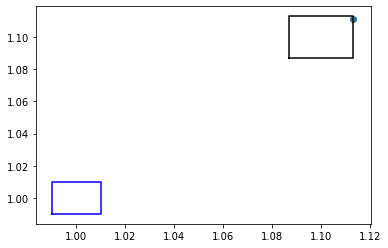

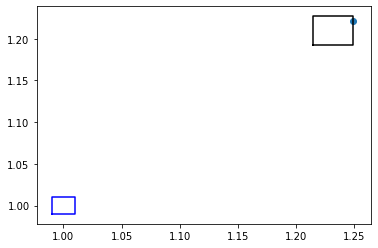

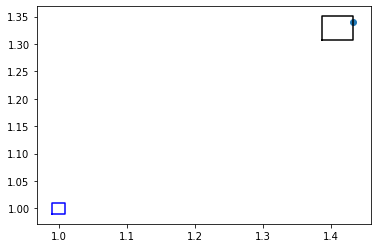

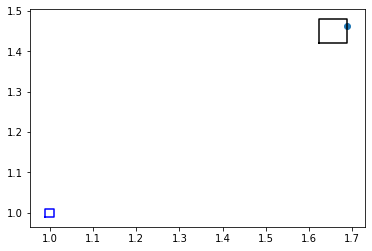

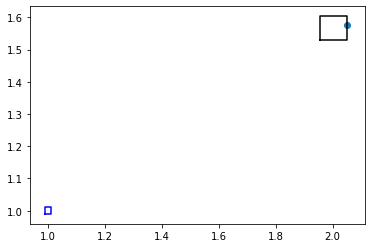

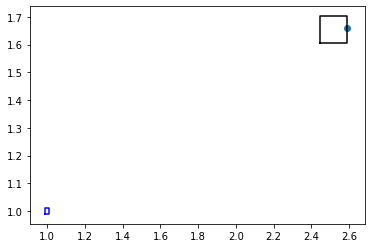

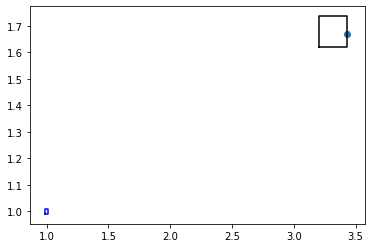

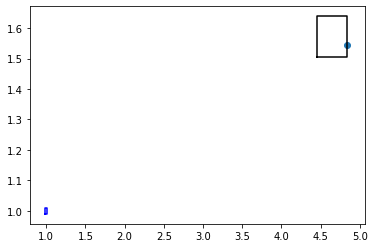

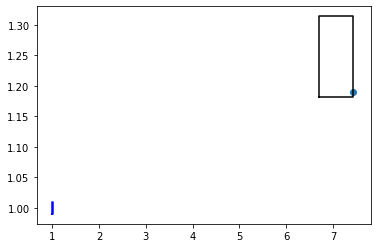

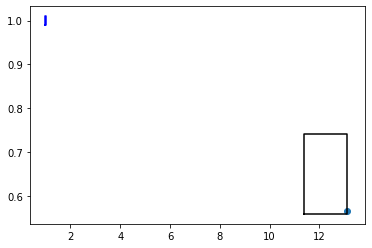

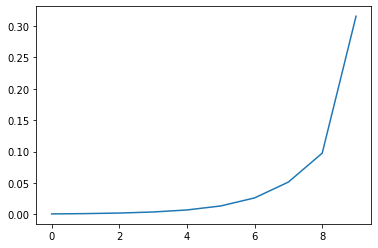

In [25]:
areas = []

boxes = [[(x_lw_b,x_up_b),(y_lw_b,y_up_b)]]

x0_bounds = BoxConstraints(x_lw_b,x_up_b)
y0_bounds = BoxConstraints(y_lw_b,y_up_b)

z_init = [1.01,1.01]

zs = [z_init]

x_0 = LinearConstraints(Line2D(1,0,0),Line2D(1,0,0),x0_bounds,y0_bounds)
y_0 = LinearConstraints(Line2D(0,1,0),Line2D(0,1,0),x0_bounds,y0_bounds)

k_0 = LinearConstraints(Line2D(-1*constants["lambda"],-1*constants["b"],constants["a"]),Line2D(-1*constants["lambda"],-1*constants["b"],constants["a"]),x0_bounds, y0_bounds) # k_0 = a - by_t - \lambda x_t
l_0 = LinearConstraints(Line2D(constants["c"],-1*constants["mu"],-1*constants["d"]),Line2D(constants["c"],-1*constants["mu"],-1*constants["d"]),x0_bounds, y0_bounds)

for t in range(constants["T"]):
#     x_0 = LinearConstraints(Line2D(1,0,0),Line2D(1,0,0),x0_bounds,y0_bounds)
#     y_0 = LinearConstraints(Line2D(0,1,0),Line2D(0,1,0),x0_bounds,y0_bounds)

    if t > 0:
        k_0 = x_0.mult_const(-1*constants["lambda"]).add(y_0.mult_const(-1*constants["b"]).add_const(constants["a"]))
        l_0 = x_0.mult_const(constants["c"]).add(y_0.mult_const(-1*constants["mu"]).add_const(-1*constants["d"]))

    m_0 = k_0.mult(x_0)
    m_0 = m_0.mult_const(constants["del_t"]).add(x_0)

    n_0 = l_0.mult(y_0)
    n_0 = n_0.mult_const(constants["del_t"]).add(y_0)
    
    x_0, y_0 = m_0, n_0
    box_x, box_y = x_0.eval_box(), y_0.eval_box()
    areas.append((box_x.upper-box_x.lower)*(box_y.upper-box_y.lower))
    boxes.append([(box_x.lower,box_x.upper),(box_y.lower,box_y.upper)])
    
    z_curr = zs[-1]
    z_next = [(constants["a"] - constants["b"]*z_curr[1] - constants["lambda"]*z_curr[0])*z_curr[0]*constants["del_t"] + z_curr[0], (-1*constants["d"] - constants["mu"]*z_curr[1] + constants["c"]*z_curr[0])*z_curr[1]*constants["del_t"] + z_curr[1]]
    zs.append(z_next)
    ######### lil plot
    fig = plt.figure(1)
    xL,xU,yL,yU = box_x.lower,box_x.upper,box_y.lower,box_y.upper 
        #plt.clf()
    plt.plot([x_lw_b,x_lw_b,x_up_b,x_up_b,x_lw_b],[y_lw_b,y_up_b,y_up_b,y_lw_b,y_lw_b],'b')
    plt.plot([xL,xL,xU,xU,xL],[yL,yU,yU,yL,yL],'k')
    plt.scatter(z_next[0],z_next[1])
    fig.canvas.draw()   # draw
    plt.pause(1.01)
    ########
    
plt.figure()
plt.plot(areas)

In [26]:
for b in boxes: print(b)

[(0.99, 1.01), (0.99, 1.01)]
[(1.08702, 1.11302), (1.08702, 1.11302)]
[(1.2148557260400001, 1.2492558740400002), (1.19311532604, 1.2269954740400002)]
[(1.3865107348841232, 1.4330395013519266), (1.3063432662092125, 1.3505673342688813)]
[(1.6225514819576792, 1.6872339568796932), (1.4217483206072028, 1.479441520735196)]
[(1.956910725263932, 2.049956506559295), (1.5287682445816382, 1.6036079041319784)]
[(2.4485341655343347, 2.588298977429884), (1.6068485538615707, 1.7023985825426418)]
[(3.2067670080809334, 3.4289186077672262), (1.6188571241580356, 1.7365178167544717)]
[(4.453302061176975, 4.835090622842406), (1.5041321828053351, 1.638666194141488)]
[(6.699275010945261, 7.437481652167662), (1.1822841134700124, 1.3141885179809072)]
[(11.380198897412875, 13.116178315963694), (0.5590980476660334, 0.7407261406328829)]


In [16]:
[(0.89096, 0.9090400000000001), (0.89096, 0.9090400000000001)]

[(0.89096, 0.9090400000000001), (0.89096, 0.9090400000000001)]

In [10]:
[(0.81983415344, 0.83616586256), (0.8020185895999989, 0.8179886264)]

[(0.81983415344, 0.83616586256), (0.8020185895999989, 0.8179886264)]